# Customer Feedback Analysis for E-commerce

In [43]:
# Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Load and Explore Data

In [44]:
# Load dataset
df = pd.read_csv('amazon_customer_reviews.csv')

# Explore dataset
print(df.head())
print(df.info())

# Focus on key columns
df = df[['reviews.text', 'reviews.rating']]
df.dropna(inplace=True)

                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  84

<ipython-input-44-5d7e2a9d9bf2>:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('amazon_customer_reviews.csv')
<ipython-input-44-5d7e2a9d9bf2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


## Data Cleaning and Preprocessing

In [45]:
# Initialize text preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_reviews'] = df['reviews.text'].apply(preprocess_text)
print(df[['reviews.text', 'cleaned_reviews']].head())

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                     cleaned_reviews  
0  product far disappointed child love use like a...  
1  great beginner experienced person bought gift ...  
2  inexpensive tablet use learn step nabi thrille...  
3  ive fire hd two week love tablet great valuewe...  
4  bought grand daughter come visit set user ente...  


## Sentiment Analysis

In [46]:
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['reviews.rating'].apply(label_sentiment)
print(df['sentiment'].value_counts())

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_reviews'])
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sentiment
positive    32315
neutral      1499
negative      812
Name: count, dtype: int64
              precision    recall  f1-score   support

    negative       1.00      0.01      0.01       157
     neutral       0.20      0.00      0.01       278
    positive       0.94      1.00      0.97      6491

    accuracy                           0.94      6926
   macro avg       0.71      0.34      0.33      6926
weighted avg       0.91      0.94      0.91      6926



## Topic Modeling

In [47]:
count_vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = count_vectorizer.fit_transform(df['cleaned_reviews'])

lda = LDA(n_components=5, random_state=42)
lda.fit(dtm)

for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['box', 'stick', 'use', 'prime', 'watch', 'work', 'movie', 'great', 'amazon', 'tv']
Topic 2:
['product', 'screen', 'kid', 'work', 'apps', 'amazon', 'price', 'good', 'great', 'tablet']
Topic 3:
['paperwhite', 'new', 'love', 'screen', 'like', 'light', 'reading', 'book', 'read', 'kindle']
Topic 4:
['speaker', 'sound', 'amazon', 'home', 'love', 'use', 'great', 'alexa', 'music', 'echo']
Topic 5:
['kid', 'year', 'old', 'gift', 'tablet', 'use', 'bought', 'easy', 'great', 'love']


## Visualization

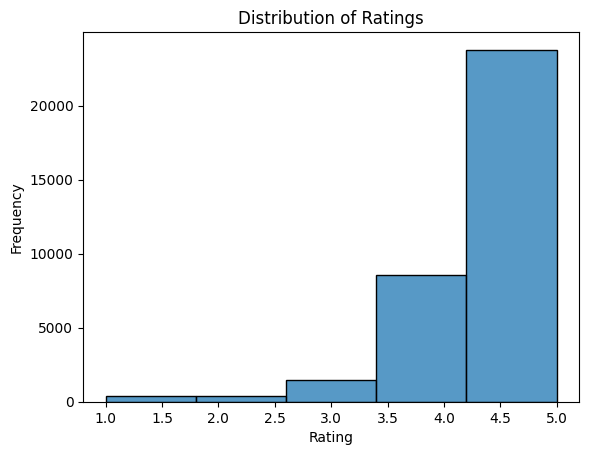

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['reviews.rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

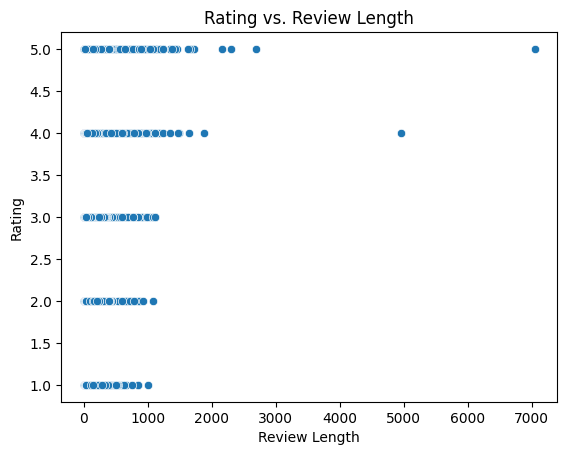

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate review length and add it as a new column to the DataFrame
# Calculate review length and add it as a new column to the DataFrame
df['review_length'] = df['cleaned_reviews'].astype(str).apply(len)
# Now you can create the scatterplot
sns.scatterplot(x='review_length', y='reviews.rating', data=df)
plt.title('Rating vs. Review Length')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

In [50]:
max_review_length = df['review_length'].max()
print(f"The largest review length is: {max_review_length}")

The largest review length is: 7048


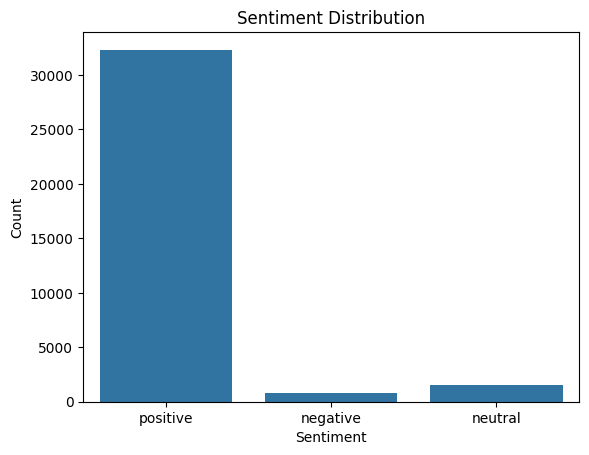

sentiment
positive    32315
neutral      1499
negative      812
Name: count, dtype: int64


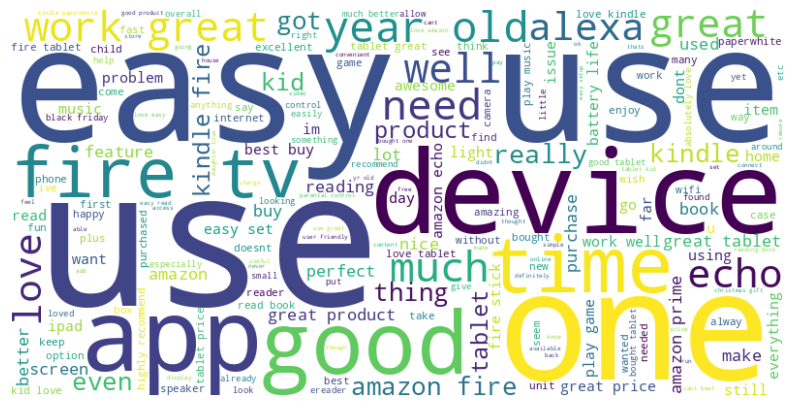

In [51]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

print(df['sentiment'].value_counts())

wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(df['cleaned_reviews']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Save Results

In [52]:
df.to_csv('cleaned_amazon_reviews.csv', index=False)

import pickle
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

**Sentiment Labels**

In [53]:
def label_sentiment(rating):
    if rating >= 4:  # Positive for ratings 4 and 5
        return 'positive'
    elif rating == 3:  # Neutral for rating 3
        return 'neutral'
    else:  # Negative for ratings 1 and 2
        return 'negative'

# Apply sentiment labeling
df['sentiment'] = df['reviews.rating'].apply(label_sentiment)
print(df['sentiment'].value_counts())


sentiment
positive    32315
neutral      1499
negative      812
Name: count, dtype: int64


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize cleaned reviews
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_reviews'])  # Feature matrix
y = df['sentiment']  # Target labels


In [55]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict sentiments
y_pred = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       1.00      0.01      0.01       157
     neutral       0.20      0.00      0.01       278
    positive       0.94      1.00      0.97      6491

    accuracy                           0.94      6926
   macro avg       0.71      0.34      0.33      6926
weighted avg       0.91      0.94      0.91      6926



In [57]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

    negative       0.62      0.03      0.06       157
     neutral       1.00      0.01      0.02       278
    positive       0.94      1.00      0.97      6491

    accuracy                           0.94      6926
   macro avg       0.85      0.35      0.35      6926
weighted avg       0.93      0.94      0.91      6926



The next step after completing Sentiment Analysis is Topic Modeling to uncover the common themes discussed in customer reviews. Topic Modeling helps identify key areas of concern or frequently discussed aspects of products.

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a document-term matrix
count_vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = count_vectorizer.fit_transform(df['cleaned_reviews'])


In [59]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(dtm)

# Display top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:
['box', 'stick', 'use', 'prime', 'watch', 'work', 'movie', 'great', 'amazon', 'tv']
Topic 2:
['product', 'screen', 'kid', 'work', 'apps', 'amazon', 'price', 'good', 'great', 'tablet']
Topic 3:
['paperwhite', 'new', 'love', 'screen', 'like', 'light', 'reading', 'book', 'read', 'kindle']
Topic 4:
['speaker', 'sound', 'amazon', 'home', 'love', 'use', 'great', 'alexa', 'music', 'echo']
Topic 5:
['kid', 'year', 'old', 'gift', 'tablet', 'use', 'bought', 'easy', 'great', 'love']


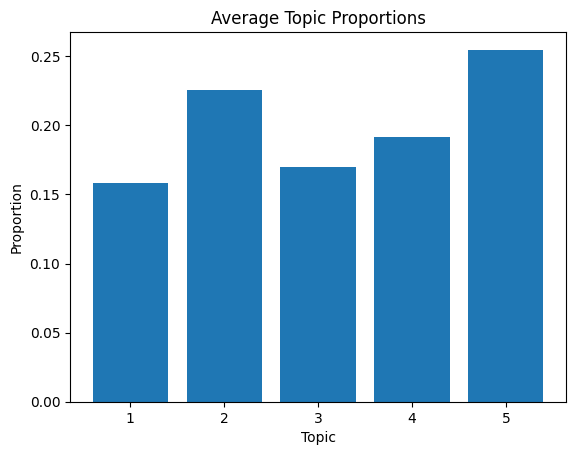

In [60]:
import matplotlib.pyplot as plt

# Get topic proportions for each review
topic_values = lda.transform(dtm)

# Plot the proportion of reviews for each topic
plt.bar(range(1, 6), topic_values.mean(axis=0))  # Adjust range based on number of topics
plt.title("Average Topic Proportions")
plt.xlabel("Topic")
plt.ylabel("Proportion")
plt.show()


In [61]:
# Assign the most dominant topic to each review
df['dominant_topic'] = topic_values.argmax(axis=1)
print(df[['cleaned_reviews', 'dominant_topic']].head())


                                     cleaned_reviews  dominant_topic
0  product far disappointed child love use like a...               0
1  great beginner experienced person bought gift ...               4
2  inexpensive tablet use learn step nabi thrille...               4
3  ive fire hd two week love tablet great valuewe...               2
4  bought grand daughter come visit set user ente...               1
